# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# 130 data points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1. Is the distribution of body temperature normal? 

Think about ways you're going to check for the normality of distribution. 
Graphical method used first, other ways:

In [4]:
# Define ecdf: Compare data and the normal distribution model to determine if body temperature is normal
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [5]:
# Let's generate 100,000 temperature data that follow a normal distribution 
# using mean and sd of the dataset to scale the range.

tempmean = np.mean(df['temperature'])
tempstd = np.std(df['temperature'])
samples = np.random.normal(tempmean, tempstd, size = 100000)

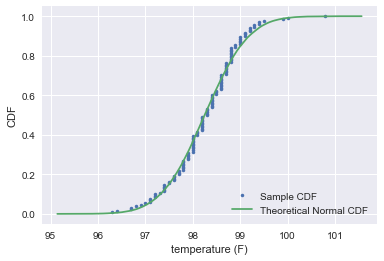

In [6]:
# checking normality of temperature data.
# CDF shows temperature data are approximately normally distributed

sns.set()

x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

_= plt.plot(x, y, marker = '.', linestyle='none')
_= plt.plot(x_theor, y_theor)
_= plt.xlabel('temperature (F)')
_= plt.ylabel('CDF')

_= plt.legend(('Sample CDF', 'Theoretical Normal CDF'), loc= 'lower right')
plt.show()

Theoretical CDF overlay with the empirical CDF suggest that body temperature is normally distributed. 

### 2. Is the sample size large? Are the observations independent? 

Remember that this is a condition for CLT, and hence the statistical test we are using, to apply.


In [7]:
len(df)

130

Our sample size is 130, which satisfy the minimum sample size of 30 for CLT. Observation are assumed to be independent as temperature for one person is not related to temperature of another person.

### 3. Is the true population mean really 98.6 F? 

First, try a bootstrap hypothesis test. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the t or z statistic? Now try using the other test. How is the result be different? Why?


We are interested in testing if mean temperature is really 98.6F. 

$$H_0: \mu_{temp} = 98.6$$

$$H_1: \mu_{temp} \neq 98.6$$



In [8]:
# Bootstrap hypothesis test

size = 10000
bs_replicates = np.empty(size)
for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))
    
# compute fraction of replicates that are equal to 98.6
bs_replicates = np.around(bs_replicates, decimals=1)
p = np.sum(bs_replicates==98.6)/size

print("Given that p-value for bootstrap hypothesis test = ", p, 'we reject the null hypothesis that mean body temperature is 98.6 with 95% confidence interval')

Given that p-value for bootstrap hypothesis test =  0.0 we reject the null hypothesis that mean body temperature is 98.6 with 95% confidence interval


**One-sample or two-sample?**

To compare mean of the given sample with generally accepted body temperature of 98.6, I will use **1-sample test** as we are comparing one set of data to a single number, 98.6

**t-statistics or z-statistics?**

You must know the population standard deviation to be able to use Z-score, since we do not have the population standard deviation, **we will be using t-score**.


In [9]:
# one sample t-test
from scipy.stats import ttest_1samp

t, p = ttest_1samp(df['temperature'], popmean = 98.6)
print("t-stat: {}, p-value: {}".format(t, p))

t-stat: -5.4548232923645195, p-value: 2.4106320415561276e-07


Our t-statistics of -5.45 indicate we would observe a mean of 98.6 at 5.45 sd from the mean and p-value is below significance level of 0.05, hence we reject the null hypothesis

In [10]:
# one sample z-test

from statsmodels.stats.weightstats import ztest
z, p = ztest(df['temperature'], value = 98.6)
print("z-stat: {}, p-value: {}". format(z, p))

z-stat: -5.4548232923645195, p-value: 4.9021570141012155e-08


t-test and z-test both produced p-values that reject null hypothesis that population mean is 98.6F

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of t and z statistics?




In [15]:
small_sample = np.random.choice(df['temperature'], size = 10, replace=False)

t2, tp = ttest_1samp(small_sample, popmean = 98.6)
z2, zp = ztest(small_sample, value = 98.6)

print("p-value for t-test:", tp,", z-test:", zp)

p-value for t-test: 0.24726203575556024 , z-test: 0.21595231087227795


For smaller sample size of 10, we should use t-test.

Repeated runs of the t-test and z-test on the smaller sample size of 10 consistently produces lower p-values from the z-test than from the t-test. This is likely due to the fact that the t-test takes into account the degrees of freedom (n-1=129 in this case), whereas the z-test does not take into account the degrees of freedom. In this particular scenario, it seems that if we are able to assume that the sample standard deviation is the population standard deviation and it is appropriate to use the z-test, then we have a higher likelihood of rejecting the null hypothesis.

### 5 At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.. Is the sample size large? Are the observations independent? 



In [23]:
# Bootstrap approach
# compute 95% CI.
CI = np.percentile(bs_replicates, [2.5, 97.5])

# compute margin of error
moe = 1.96 * bs_replicates.std()
print('The 95% confidence interval is from ', CI[0], ' to ', CI[1], '.')
print()
print('The margin of error, as computed from the bootstrap replicates, is: ', moe)
print()
print('Temperatures above and below the confidence interval are considered statistically abnormal.')

The 95% confidence interval is from  98.1  to  98.4 .

The margin of error, as computed from the bootstrap replicates, is:  0.13896184923582383

Temperatures above and below the confidence interval are considered statistically abnormal.


### 6. Is there a significant difference between males and females in normal temperature?

What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.


In [22]:
# Segment population by gender
males = df.loc[(df.gender == 'M')]
females = df.loc[(df.gender == 'F')]

# Perform two-sample t-test
from scipy.stats import ttest_ind
t, p = ttest_ind(males['temperature'], females['temperature'])
print('The null hypothesis claims that the mean body temperatures of males is the same as the mean body temperature of females.')
print('P-value for two-sample t-test: ', p)
print('Given that the p value is sufficiently small, <0.05, we reject the null hypothesis.')

The null hypothesis claims that the mean body temperatures of males is the same as the mean body temperature of females.
P-value for two-sample t-test:  0.02393188312239561
Given that the p value is sufficiently small, <0.05, we reject the null hypothesis.
